In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
data = pd.read_csv('women.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
for i in data.iloc[: , 5 : ].columns:
    print(f'{i} : {data[i].nunique()}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


In [4]:
# checking all null values
data.isna().sum()

In [6]:
# dropping all null values
data = data.dropna().reset_index(drop = True)

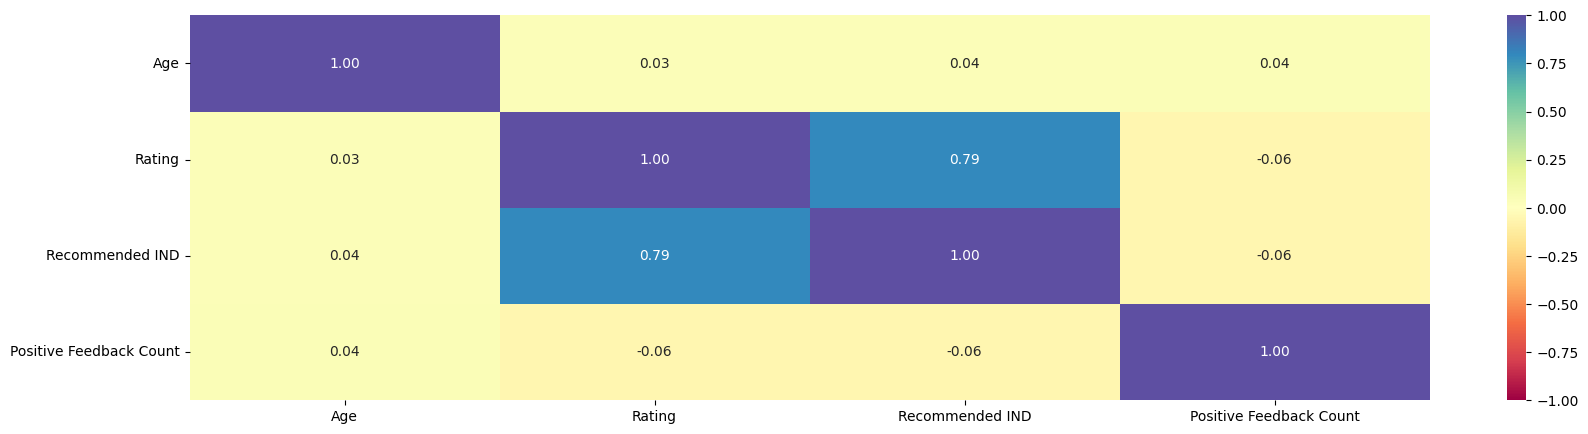

In [11]:
# correlation check

num_cols = data.select_dtypes(exclude = 'object')
num_cols = num_cols.drop(['Unnamed: 0','Clothing ID'], axis = 1)

plt.figure(figsize=(20, 5))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Clustering model

In [13]:
# Select the required variables 
new_df = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]


### Label encoding 

In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in new_df.iloc[:,4 : ].columns:
    new_df[col] = le.fit_transform(new_df[col])

### Scaling Data

In [14]:
scaler = StandardScaler()
scaler.fit(new_df)
scaled_df = pd.DataFrame(scaler.transform(new_df), columns = new_df.columns, index = new_df.index)
scaled_df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1.365594,-1.063792,-2.121287,-0.454648,-0.767506,-0.827210,-0.751171
1,0.549788,0.734452,0.471412,-0.454648,0.869585,-1.439835,1.164139
2,0.305046,0.734452,0.471412,0.573782,-0.767506,1.010667,-1.325764
3,0.468207,-1.962914,-2.121287,0.230972,-0.767506,-0.827210,-0.751171
4,-0.347599,0.734452,0.471412,-0.283243,0.869585,1.010667,0.206484


### K means algo execution

In [16]:
error = []
for k in range(1,11):
    km = KMeans(n_clusters = k)
    km.fit_predict(scaled_df)
    error.append(km.inertia_)

### Elbow metthod for best K value 

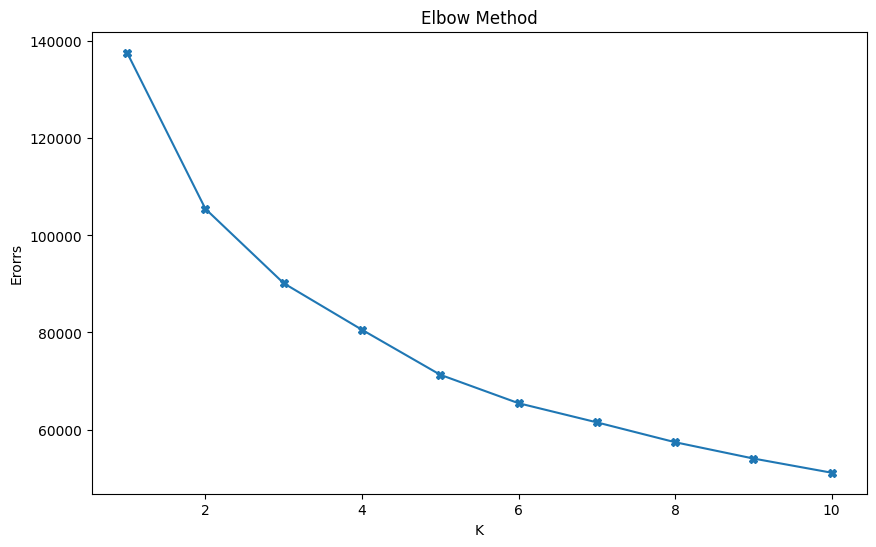

In [17]:
plt.figure(figsize = (10,6))
plt.plot(list(range(1,11)), error, marker = 'X')
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Erorrs')
plt.show()

### Silhouette Coefficient

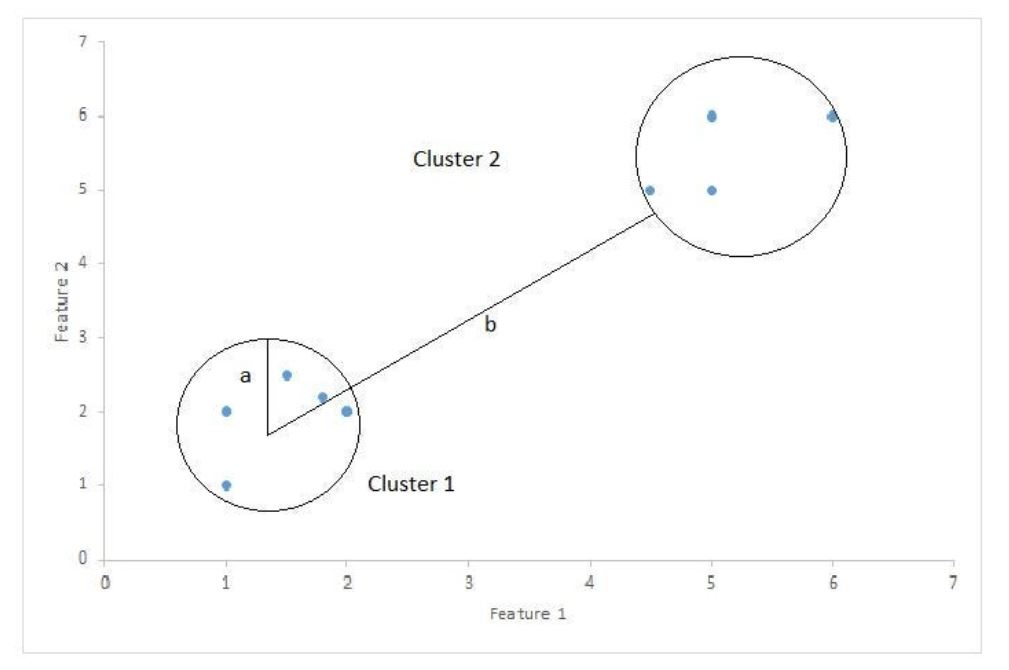

In [18]:
from sklearn.metrics import silhouette_score
sil_score = []
for k in range(2,11):
    km = KMeans(n_clusters = k)
    pred = km.fit_predict(scaled_df)
    score = silhouette_score(scaled_df, pred)
    sil_score.append(score)
    print(f'Silhouette Score for K = {k} is {score}')

Silhouette Score for K = 2 is 0.3386120672854935
Silhouette Score for K = 3 is 0.22442249069480577
Silhouette Score for K = 4 is 0.23553907155215956
Silhouette Score for K = 5 is 0.24537413953282894
Silhouette Score for K = 6 is 0.23306186663573816
Silhouette Score for K = 7 is 0.22797880855929006
Silhouette Score for K = 8 is 0.23463420378238692
Silhouette Score for K = 9 is 0.22816633154480132
Silhouette Score for K = 10 is 0.24058428635460383


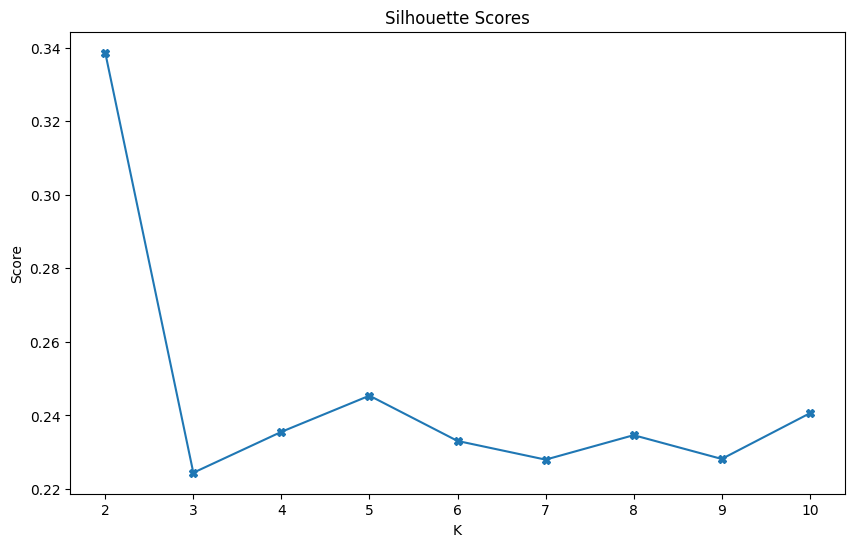

In [19]:
plt.figure(figsize = (10,6))
plt.plot(list(range(2,11)), sil_score, marker = 'X')
plt.title('Silhouette Scores')
plt.xlabel('K')
plt.ylabel('Score')
plt.show()

### K= 5 

In [20]:
model = KMeans(n_clusters = 5, random_state = 1)
model.fit_predict(scaled_df)

array([0, 4, 2, ..., 0, 1, 3])

### Adding Labels to new_df and scaled_df

In [21]:
scaled_df['Labels'] = model.labels_
new_df['Labels'] = model.labels_
new_df.sample(5)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
3123,31,3,0,37,0,1,3,3
12473,65,5,1,0,0,4,0,2
5590,57,1,0,17,0,4,4,0
19077,39,5,1,8,0,4,0,2
17664,65,4,1,0,0,4,8,2


In [22]:
new_df.Labels.value_counts()

2    7262
1    6177
0    3437
4    2277
3     509
Name: Labels, dtype: int64

### Cluster Profiling

In [23]:
new_df2 = data[['Age', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name','Department Name','Class Name']]

In [24]:
new_df2['Labels'] = new_df['Labels']
new_df2.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Labels
0,60,3,0,0,General,Dresses,Dresses,0
1,50,5,1,0,General Petite,Bottoms,Pants,4
2,47,5,1,6,General,Tops,Blouses,2
3,49,2,0,4,General,Dresses,Dresses,0
4,39,5,1,1,General Petite,Tops,Knits,2


In [25]:
# Overall level summary
new_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,19662.0,43.260808,12.258122,18.0,34.0,41.0,52.0,99.0
Rating,19662.0,4.183145,1.112224,1.0,4.0,5.0,5.0,5.0
Recommended IND,19662.0,0.818177,0.385708,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,19662.0,2.652477,5.834285,0.0,0.0,1.0,3.0,122.0
Labels,19662.0,1.593734,1.156507,0.0,1.0,2.0,2.0,4.0


### Cluster means 

In [26]:
cluster_means = new_df2.groupby('Labels').mean().reset_index()
cluster_means.style.highlight_max(color="lightpink", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.291533,2.281059,0.001746,2.597032
1,1,42.507528,4.594301,0.999191,1.846366
2,2,44.277472,4.599284,0.999036,1.792068
3,3,45.990177,4.168959,0.815324,28.762279
4,4,42.914800,4.614844,0.983311,1.830479


In [27]:
cluster_means.style.highlight_min(color="lightgreen", axis=0)

,Labels,Age,Rating,Recommended IND,Positive Feedback Count
0,0,42.291533,2.281059,0.001746,2.597032
1,1,42.507528,4.594301,0.999191,1.846366
2,2,44.277472,4.599284,0.999036,1.792068
3,3,45.990177,4.168959,0.815324,28.762279
4,4,42.914800,4.614844,0.983311,1.830479


Cluster 1 ,2 & 4 giving best ratings as well as recommending products

Cluster 0 consists of women giving least ratings and least recommendation but Positive feedback Count is higher

Cluster 3 is women with satisfactory ratings and Recommendations.

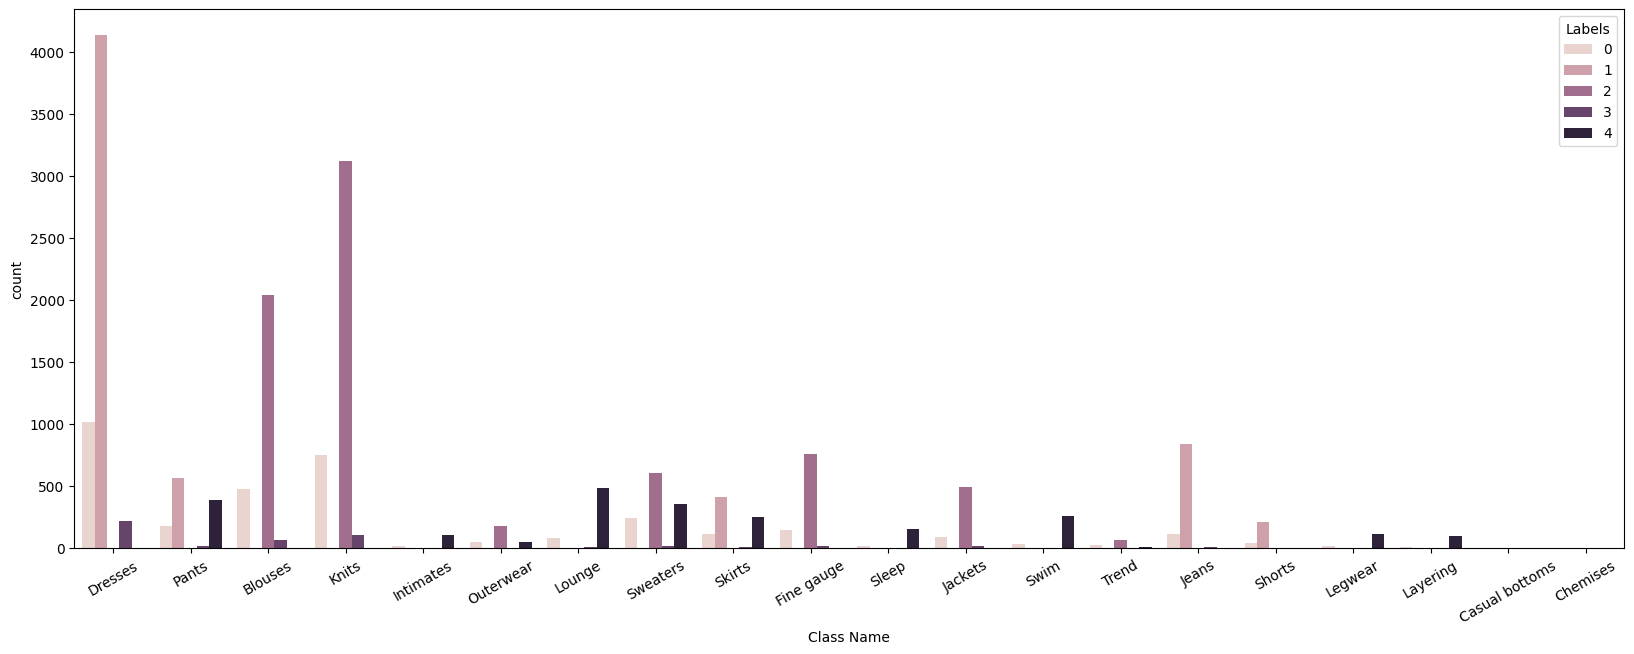

In [28]:
plt.figure(figsize = (20,7))
sns.countplot(x = new_df2['Class Name'], hue = new_df2['Labels'])
plt.xticks(rotation = 30)
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

Women in Cluster 2 tensds to buy Dresses, Pants, Skirts, Jeans and Shorts

Women in Cluster 1 are more interested in Blouses, Knits, Sweaters, Fine Gauge and Jackets.

Cluster 4 are more attracted to Pants, Lounge , Sweaters, skirts , Swim , Legwear and Layering.

Cluster 3 are less in no. and buying mostly Dresses, Pants , Blouses and Knits.

Women in cluster 0 shownig average approach like cluster 3.

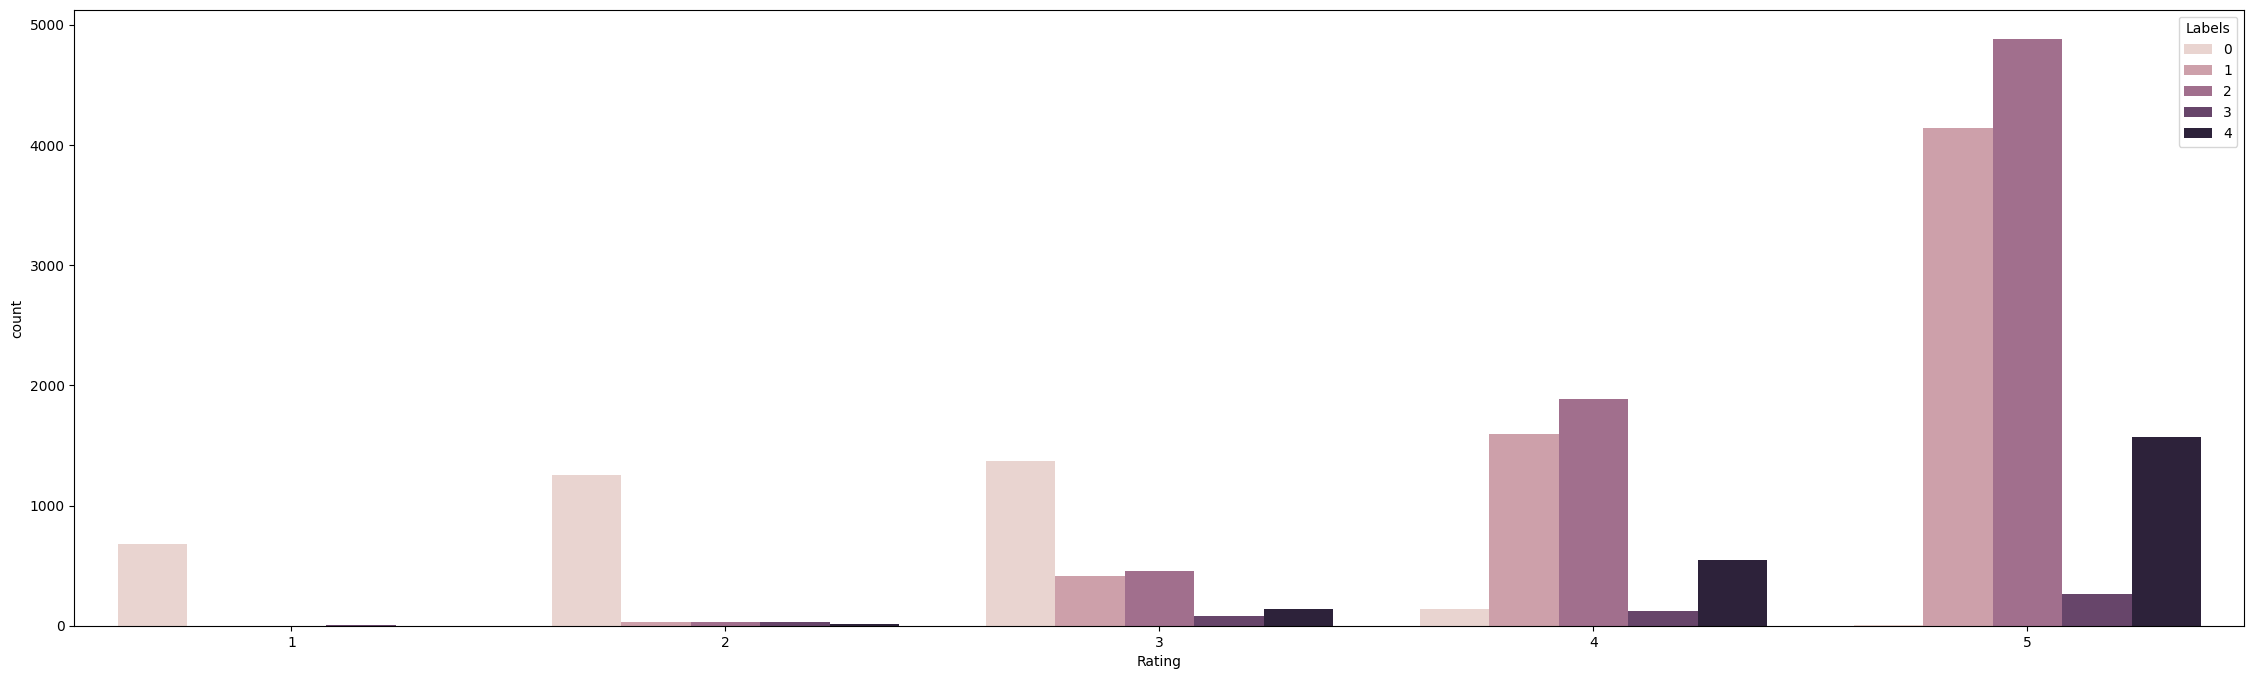

In [29]:
plt.figure(figsize = (28,8))
sns.countplot(x = new_df2['Rating'], hue = new_df2['Labels'])
plt.legend(loc = 'upper right', title = "Labels")
plt.show()

Women in Cluster 0 giving 1,2 & 3 rating out if 5, which is least in all of the cluster groups
Rest of the Clusters giving good average rating.

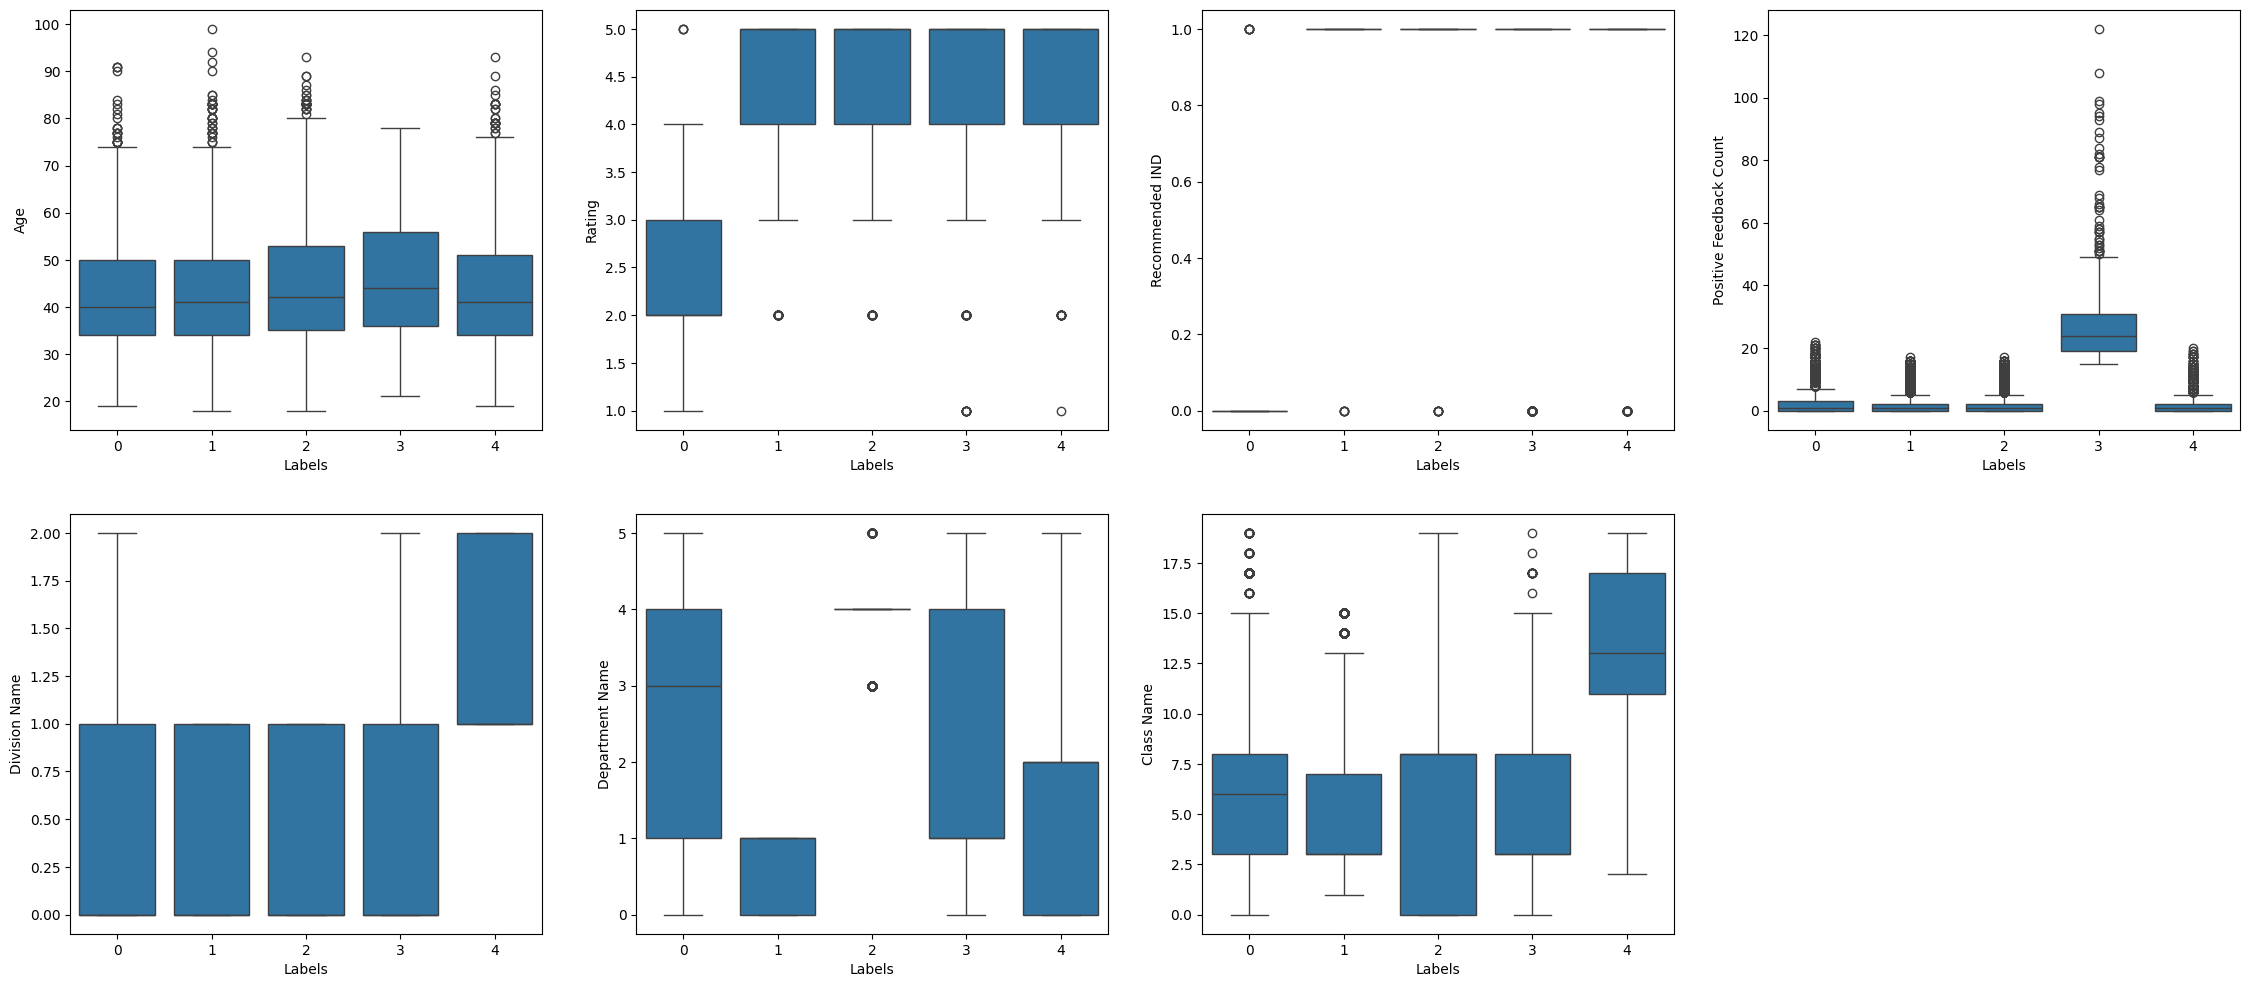

In [30]:
plt.figure(figsize = (28,12))
for i in enumerate(new_df.iloc[:, 0 : 7].columns):
    plt.subplot(2, 4 , i[0] + 1)
    sns.boxplot(y = new_df[i[1]], x = new_df['Labels'])
plt.show()

In [31]:
le.classes_

array(['Blouses', 'Casual bottoms', 'Chemises', 'Dresses', 'Fine gauge',
       'Intimates', 'Jackets', 'Jeans', 'Knits', 'Layering', 'Legwear',
       'Lounge', 'Outerwear', 'Pants', 'Shorts', 'Skirts', 'Sleep',
       'Sweaters', 'Swim', 'Trend'], dtype=object)

## Conclusions